## Name: Abhishek D M
## Email: abhishekdm6@gmail.com

### LOGISTIC REGRESSION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Combine for consistent preprocessing
data = pd.concat([train_df, test_df], ignore_index=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.02006

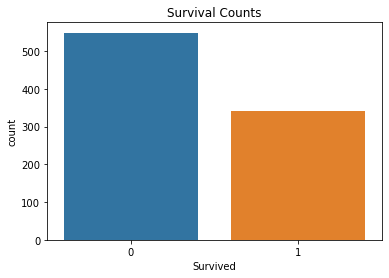

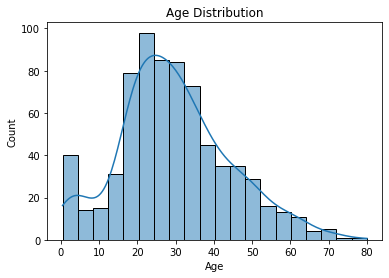

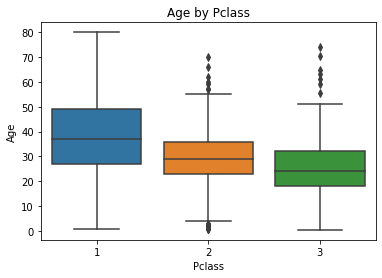

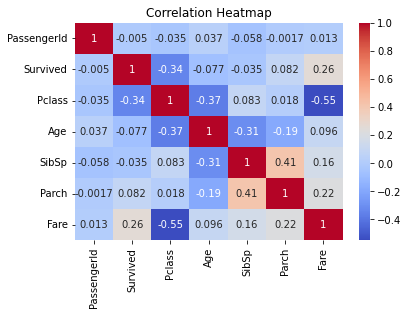

In [3]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Visualizations
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Counts')
plt.show()

sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title('Age by Pclass')
plt.show()

sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [4]:
# Missing values
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Encoding
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data.loc[:len(train_df)-1, features]
y = train_df['Survived']

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1: 0.7638888888888888
ROC-AUC: 0.8812097812097812


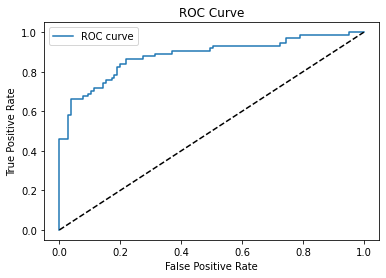

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [5]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_val_scaled)
y_prob = logreg.predict_proba(X_val_scaled)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("Classification Report:")
print(classification_report(y_val, y_pred))


In [6]:
print("Coefficients interpretation:")
for feature, coef in zip(features, logreg.coef_[0]):
    print(f"{feature}: {coef}")


Coefficients interpretation:
Pclass: -0.7825666850249947
Sex: -1.2789141032329259
Age: -0.4048178395891179
SibSp: -0.35117106241156615
Parch: -0.10181934185906752
Fare: 0.12436922380732285
Embarked: -0.1747498232542199


In [7]:

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})
coefficients


,Feature,Coefficient
0,Pclass,-0.782567
1,Sex,-1.278914
2,Age,-0.404818
3,SibSp,-0.351171
4,Parch,-0.101819
5,Fare,0.124369
6,Embarked,-0.174750


### significance of features in predicting survival probability:

- Pclass: Lower class passengers (higher Pclass number) had a lower chance of survival. First class passengers were prioritized during evacuation, making Pclass a significant predictor.
  
- Sex: Among the strongest predictors. Female passengers had a much higher survival probability due to “women and children first” rescue rules.
  
- Age: Younger passengers (especially children) had a moderately higher chance of survival. Extremely old or very young passengers sometimes had lower physical resilience, but children were prioritized.
  
- Fare: Higher fares are associated with higher class, and thus indirectly linked to better survival chances.
  
- Embarked: The port of embarkation might reflect socio-economic background or class differences, with some ports associated with more third-class passengers.

Overall, Sex and Pclass are usually the most significant features for predicting survival on the Titanic.


In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("logistic_model.pkl")

st.title("Titanic Survival Prediction")

# user inputs
Pclass = st.selectbox("Passenger Class", [1, 2, 3])
Sex = st.selectbox("Sex", ['male', 'female'])
Age = st.slider("Age", 0, 80, 30)
Fare = st.slider("Fare", 0, 500, 50)
Embarked = st.selectbox("Port of Embarkation", ['C', 'Q', 'S'])

# one-hot encoding Sex
Sex_male = 1 if Sex == 'male' else 0

# one-hot encoding Embarked
Embarked_C = 1 if Embarked == 'C' else 0
Embarked_Q = 1 if Embarked == 'Q' else 0
Embarked_S = 1 if Embarked == 'S' else 0

# build input dataframe with 7 features
input_df = pd.DataFrame({
    'Pclass': [Pclass],
    'Age': [Age],
    'Fare': [Fare],
    'Sex_male': [Sex_male],
    'Embarked_C': [Embarked_C],
    'Embarked_Q': [Embarked_Q],
    'Embarked_S': [Embarked_S]
})

if st.button("Predict"):
    pred = model.predict(input_df)
    result = "Survived" if pred[0] == 1 else "Did not survive"
    st.success(f"Prediction: {result}")
